<a href="https://colab.research.google.com/github/SatyamPal99/Sports_VS_Politics_Classification/blob/main/Sports_VS_Politics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
pip install scikit-learn pandas numpy matplotlib seaborn nltk

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Loading Dataset...
Total Documents Loaded: 2772
Number of Sports Documents: 1197
Number of Politics Documents: 1575

Cleaning Text...
Training Samples: 2217
Testing Samples: 555

Feature Method: Bag of Words

Model: Naive Bayes
Accuracy : 94.95 %
Precision: 94.44 %
Recall   : 97.29 %
F1 Score : 95.85 %


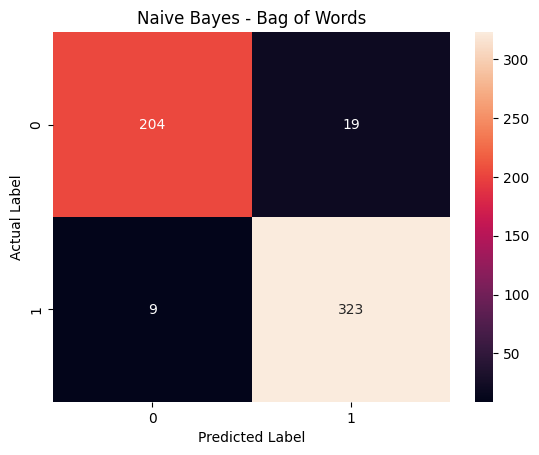


Model: Logistic Regression
Accuracy : 92.07 %
Precision: 95.28 %
Recall   : 91.27 %
F1 Score : 93.23 %


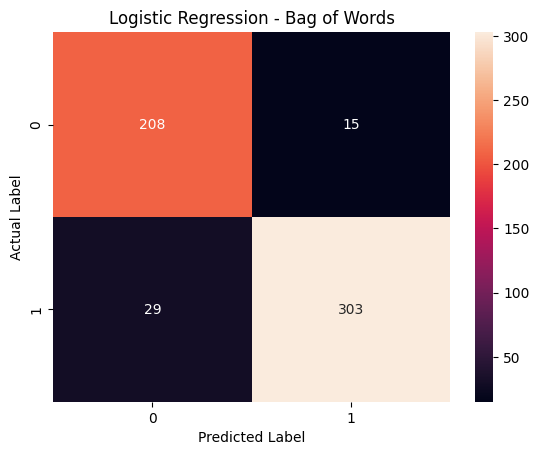


Model: Support Vector Machine
Accuracy : 90.81 %
Precision: 91.2 %
Recall   : 93.67 %
F1 Score : 92.42 %


/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


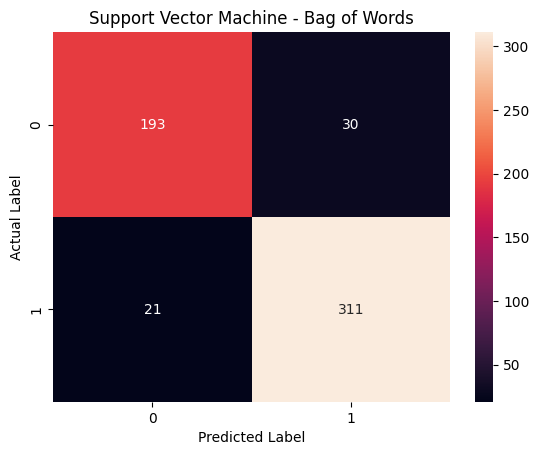


Feature Method: TF-IDF

Model: Naive Bayes
Accuracy : 94.59 %
Precision: 92.18 %
Recall   : 99.4 %
F1 Score : 95.65 %


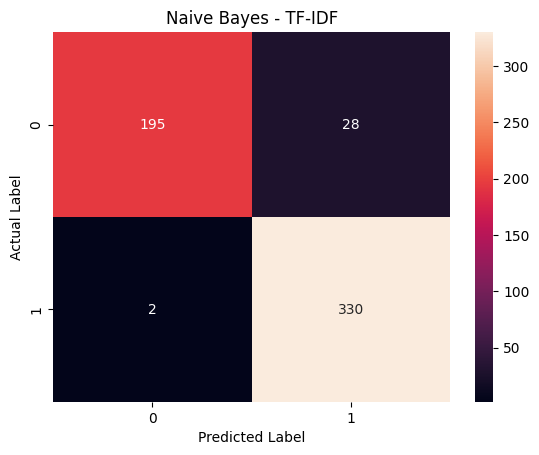


Model: Logistic Regression
Accuracy : 93.69 %
Precision: 92.07 %
Recall   : 97.89 %
F1 Score : 94.89 %


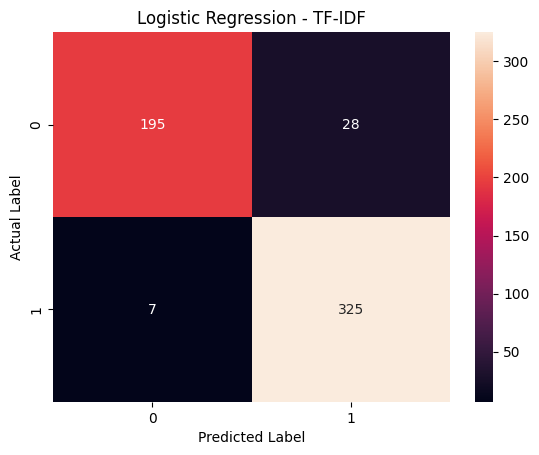


Model: Support Vector Machine
Accuracy : 93.33 %
Precision: 93.26 %
Recall   : 95.78 %
F1 Score : 94.5 %


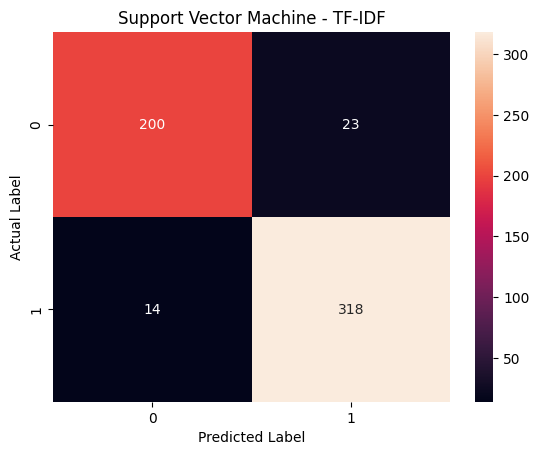


Feature Method: N-grams (1,2)

Model: Naive Bayes
Accuracy : 92.79 %
Precision: 89.46 %
Recall   : 99.7 %
F1 Score : 94.3 %


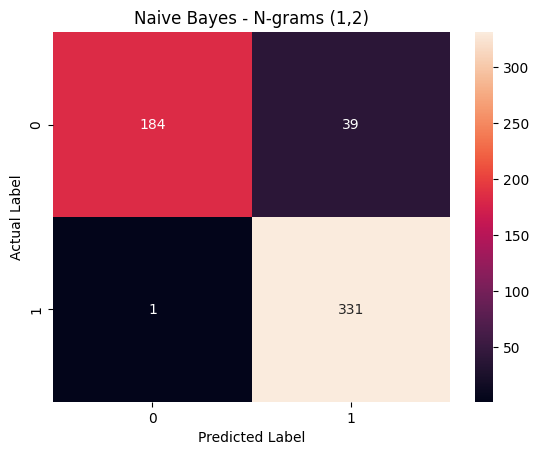


Model: Logistic Regression
Accuracy : 94.05 %
Precision: 91.64 %
Recall   : 99.1 %
F1 Score : 95.22 %


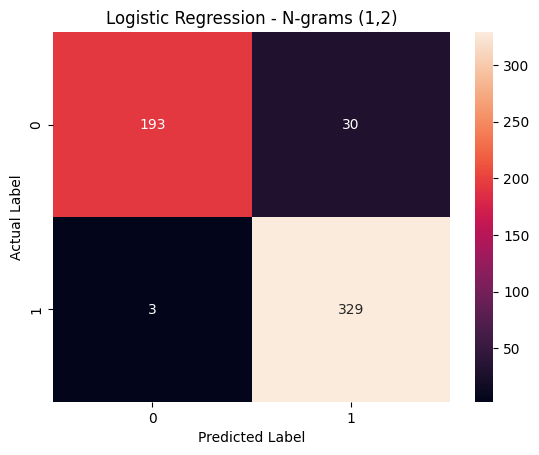


Model: Support Vector Machine
Accuracy : 93.69 %
Precision: 92.8 %
Recall   : 96.99 %
F1 Score : 94.85 %


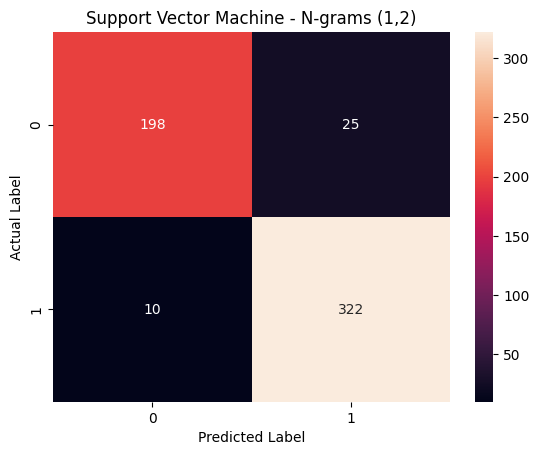


================ FINAL MODEL COMPARISON ================
  Feature Method                   Model  Accuracy  Precision    Recall  \
0   Bag of Words             Naive Bayes  0.949550   0.944444  0.972892   
3         TF-IDF             Naive Bayes  0.945946   0.921788  0.993976   
7  N-grams (1,2)     Logistic Regression  0.940541   0.916435  0.990964   
8  N-grams (1,2)  Support Vector Machine  0.936937   0.927954  0.969880   
4         TF-IDF     Logistic Regression  0.936937   0.920680  0.978916   
5         TF-IDF  Support Vector Machine  0.933333   0.932551  0.957831   
6  N-grams (1,2)             Naive Bayes  0.927928   0.894595  0.996988   
1   Bag of Words     Logistic Regression  0.920721   0.952830  0.912651   
2   Bag of Words  Support Vector Machine  0.908108   0.912023  0.936747   

   F1 Score  
0  0.958457  
3  0.956522  
7  0.952243  
8  0.948454  
4  0.948905  
5  0.945022  
6  0.943020  
1  0.932308  
2  0.924220  

Results saved as: final_model_comparison.csv

Exec

In [7]:
# Import Required Libraries

import re                          # For text cleaning using regular expressions
import nltk                        # Natural Language Toolkit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords  # To remove common English words
from nltk.stem import PorterStemmer  # For stemming words

# Sklearn modules for ML pipeline
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# ==========================================================
# STEP 1: Download Required NLTK Resources
# ==========================================================
# Stopwords are common words like "the", "is", "and"
# which do not add much meaning to classification

nltk.download('stopwords')


# ==========================================================
# STEP 2: Load Dataset
# ==========================================================
# We use the 20 Newsgroups dataset (built-in in sklearn)
# We select specific categories related to sports and politics

print("\nLoading Dataset...")

sports_categories = ['rec.sport.baseball', 'rec.sport.hockey']
politics_categories = ['talk.politics.misc',
                       'talk.politics.guns',
                       'talk.politics.mideast']

# Combine categories
categories = sports_categories + politics_categories

# Load dataset while removing headers, footers, and quotes
dataset = fetch_20newsgroups(
    categories=categories,
    remove=('headers', 'footers', 'quotes')
)

print("Total Documents Loaded:", len(dataset.data))


# ==========================================================
# STEP 3: Convert Multi-Class Labels to Binary Labels
# ==========================================================
# 0 = Sports
# 1 = Politics

labels = []

for target in dataset.target:
    if dataset.target_names[target] in sports_categories:
        labels.append(0)   # Sports
    else:
        labels.append(1)   # Politics

print("Number of Sports Documents:", labels.count(0))
print("Number of Politics Documents:", labels.count(1))


# ==========================================================
# STEP 4: Text Preprocessing
# ==========================================================
# Cleaning steps:
# - Convert text to lowercase
# - Remove special characters and numbers
# - Remove stopwords
# - Apply stemming

print("\nCleaning Text...")

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text(text):
    """
    This function cleans raw text by:
    - Lowercasing
    - Removing special characters
    - Removing stopwords
    - Stemming words
    """

    # Convert to lowercase
    text = text.lower()

    # Remove anything that is not a letter
    text = re.sub(r'[^a-z\s]', '', text)

    # Tokenize (split into words)
    tokens = text.split()

    # Remove stopwords and apply stemming
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]

    # Join words back into single string
    return " ".join(tokens)

# Apply cleaning to entire dataset
cleaned_data = [clean_text(text) for text in dataset.data]


# ==========================================================
# STEP 5: Train-Test Split
# ==========================================================
# 80% for training
# 20% for testing

X_train, X_test, y_train, y_test = train_test_split(
    cleaned_data,
    labels,
    test_size=0.2,
    random_state=42
)

print("Training Samples:", len(X_train))
print("Testing Samples:", len(X_test))


# ==========================================================
# STEP 6: Define Feature Extraction Methods
# ==========================================================
# 1. Bag of Words
# 2. TF-IDF
# 3. N-grams (Unigram + Bigram)

feature_methods = {
    "Bag of Words": CountVectorizer(stop_words='english'),

    "TF-IDF": TfidfVectorizer(stop_words='english'),

    # N-grams includes both single words and two-word combinations
    "N-grams (1,2)": TfidfVectorizer(stop_words='english',
                                     ngram_range=(1, 2))
}


# ==========================================================
# STEP 7: Define Machine Learning Models
# ==========================================================
# We compare 3 different ML algorithms

ml_models = {
    "Naive Bayes": MultinomialNB(),

    "Logistic Regression": LogisticRegression(max_iter=1000),

    "Support Vector Machine": LinearSVC()
}


# ==========================================================
# STEP 8: Train and Evaluate All Combinations
# ==========================================================
# This will create 9 experiments:
# 3 Feature Methods × 3 ML Models

results = []

for feature_name, vectorizer in feature_methods.items():

    print("\n================================================")
    print("Feature Method:", feature_name)
    print("================================================")

    # Convert text into numeric feature vectors
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)

    for model_name, model in ml_models.items():

        print("\nModel:", model_name)

        # Train model
        model.fit(X_train_vec, y_train)

        # Predict on test data
        predictions = model.predict(X_test_vec)

        # Calculate evaluation metrics
        acc = accuracy_score(y_test, predictions)
        prec = precision_score(y_test, predictions)
        rec = recall_score(y_test, predictions)
        f1 = f1_score(y_test, predictions)

        print("Accuracy :", round(acc * 100, 2), "%")
        print("Precision:", round(prec * 100, 2), "%")
        print("Recall   :", round(rec * 100, 2), "%")
        print("F1 Score :", round(f1 * 100, 2), "%")

        # Store results
        results.append([feature_name, model_name, acc, prec, rec, f1])

        # Create Confusion Matrix
        cm = confusion_matrix(y_test, predictions)

        plt.figure()
        sns.heatmap(cm, annot=True, fmt='d')
        plt.title(f"{model_name} - {feature_name}")
        plt.xlabel("Predicted Label")
        plt.ylabel("Actual Label")
        plt.show()


# ==========================================================
# STEP 9: Final Comparison Table
# ==========================================================

results_df = pd.DataFrame(results,
                          columns=["Feature Method",
                                   "Model",
                                   "Accuracy",
                                   "Precision",
                                   "Recall",
                                   "F1 Score"])

# Sort by Accuracy (highest first)
results_df = results_df.sort_values(by="Accuracy",
                                    ascending=False)

print("\n================ FINAL MODEL COMPARISON ================")
print(results_df)

# Save results to CSV file
results_df.to_csv("final_model_comparison.csv", index=False)

print("\nResults saved as: final_model_comparison.csv")
print("\nExecution Completed Successfully!")
